# 1- Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

# 2- Generating Dataset

In [2]:
np.random.seed(74)

samples_num = 1000

experience_years = np.random.randint(1,30,size=samples_num)

slope = (200000-10000) / 30

intercept = 20000

salaries = slope * experience_years + intercept + np.random.normal(0,10000,size = samples_num)

data = {'experience_years':experience_years , 'salaries':salaries} 

df = pd.DataFrame(data)

# 3- Data Exploration

In [3]:
df.head()

,experience_years,salaries
0,28,188264.088542
1,10,85792.267407
2,10,72121.201576
3,5,45626.260536
4,10,78305.552969


In [4]:
df.tail()

,experience_years,salaries
995,27,183022.371795
996,2,28397.488415
997,8,54013.685081
998,26,187524.629457
999,24,172948.174354


In [5]:
df.sample(5)

,experience_years,salaries
931,6,39367.287137
790,15,115055.145610
69,3,24831.751079
521,25,176590.168828
502,8,66700.928221


In [6]:
df.describe()

,experience_years,salaries
count,1000.000000,1000.000000
mean,15.062000,115404.692338
std,8.641112,55853.692349
min,1.000000,3820.064106
25%,7.000000,66676.506803
50%,15.000000,114804.201366
75%,23.000000,164989.661835
max,29.000000,219893.168458


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
correlation = df.corr()

<Axes: >

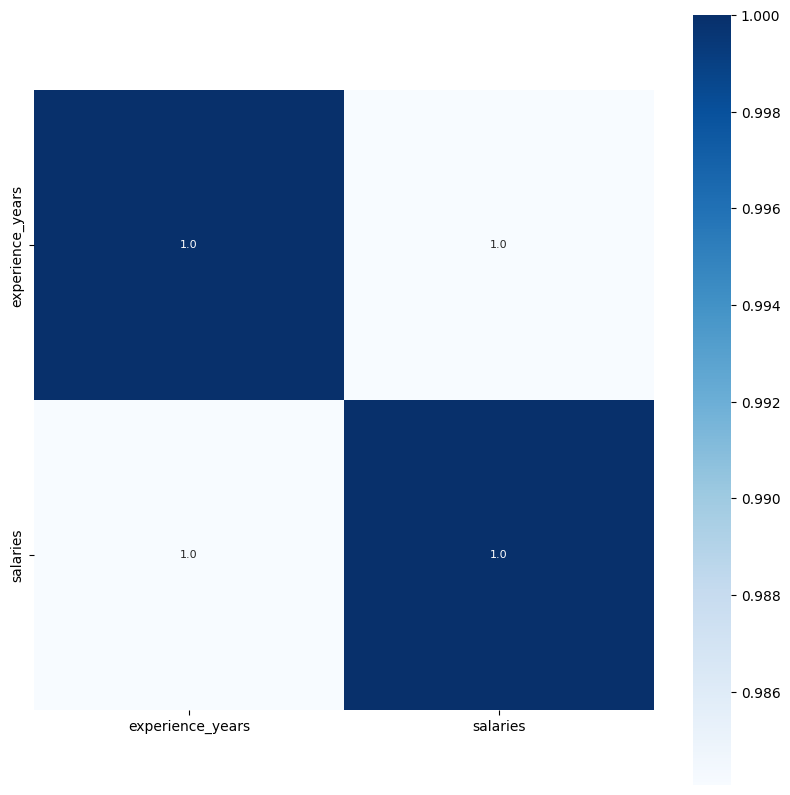

In [9]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# 4- plotting

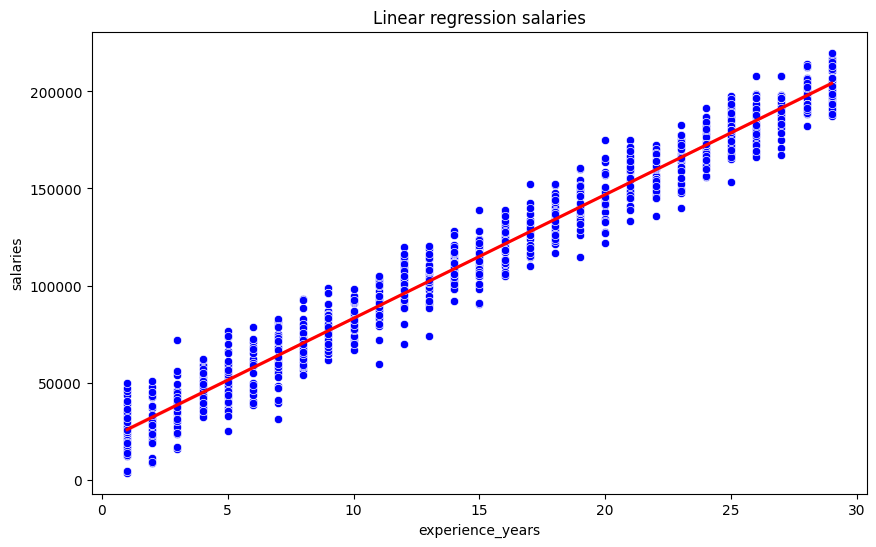

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='experience_years',y='salaries',data=df,color = 'b')
sns.regplot(x='experience_years',y='salaries',data=df ,scatter=False,color='r')
plt.title('Linear regression salaries')
plt.show()

# 5- spliting datasets

In [11]:
x = df[['experience_years']]
y = df['salaries']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [14]:
type(x_test)

pandas.core.frame.DataFrame

In [13]:
x_test.shape

(200, 1)

In [15]:
x_train.shape

(800, 1)

# 6- build model

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [18]:
lr_model.score(x_train, y_train)

0.9675032897339239

In [19]:
lr_model.score(x_test, y_test)

0.9716906423893205

In [20]:
y_pred = lr_model.predict(x_test)

In [21]:
lr_model.coef_

array([6364.76360779])

In [22]:
lr_model.intercept_

19759.96505734758

# 7- evaluation

In [23]:
# R squared error
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.9716906423893205
Mean Absolute Error :  7694.551719030028
Mean Squared Error :  89871018.07108822


Visualizing the actual Prices and predicted prices

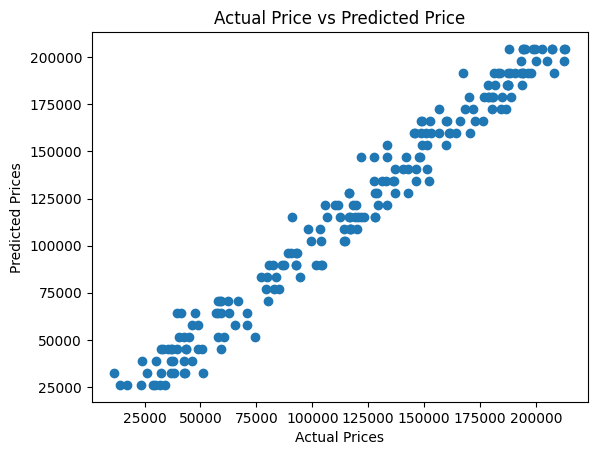

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# working on california_housing dataset

In [30]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [31]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [32]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(housing.data, columns = housing.feature_names)
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = housing.target
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [35]:
# check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [36]:
# check for missing values
house_price_dataframe.drop_duplicates(inplace=True)

In [37]:
house_price_dataframe.dropna(inplace=True)

In [38]:
# statistical measures of the dataset
house_price_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<Axes: >

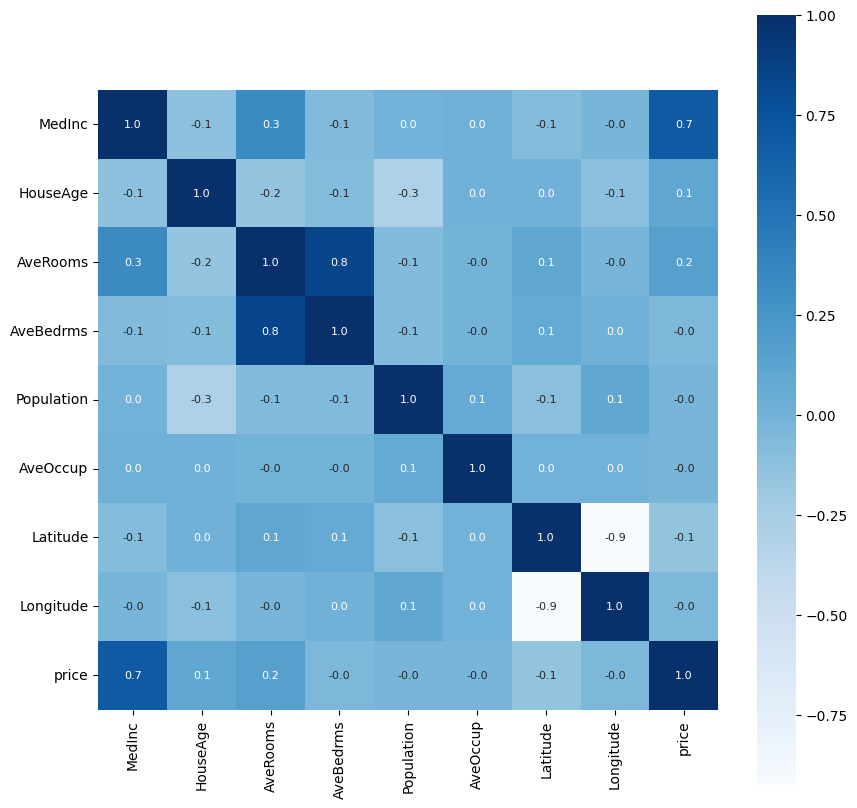

In [39]:
correlation = house_price_dataframe.corr()

# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## simple linear regression

In [40]:
x = house_price_dataframe[['MedInc']]
y = house_price_dataframe['price']

print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (20640, 1)
y shape = (20640,)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
print(x.shape, x_train.shape, x_test.shape)

(20640, 1) (16512, 1) (4128, 1)


In [43]:
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled  = scaler.fit_transform(x_test)

In [44]:
# loading the model
model = LinearRegression()

# training the model
model.fit(x_train_Scaled, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test_Scaled)

In [46]:
r2_score(y_test,y_pred)

0.4583869568059462

## mulitple linear regression

In [47]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

print(f'X shape = {X.shape}')
print(f'Y shape = {Y.shape}')

X shape = (20640, 8)
Y shape = (20640,)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [50]:
scaler = StandardScaler()

# standardizing the features
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled  = scaler.fit_transform(X_test)

In [51]:
# loading the model
model = LinearRegression()

# training the model
model.fit(X_train_Scaled, Y_train)

LinearRegression()

In [52]:
list_of_features = list(house_price_dataframe.columns)
type(list_of_features)
list_of_features.pop()
list_of_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [53]:
list_of_coef_features = list(model.coef_)
list_of_coef_features

[0.8543830309268541,
 0.1225462380784074,
 -0.29441013447329867,
 0.339259490594483,
 -0.0023077231458299824,
 -0.04082910308508747,
 -0.8969288766386656,
 -0.8698417752417177]

In [54]:
model.intercept_

2.0719469373788777

In [55]:
df = pd.DataFrame({

'Feature_Names' : list_of_features , 
'coef' : list_of_coef_features

})

df

,Feature_Names,coef
0,MedInc,0.854383
1,HouseAge,0.122546
2,AveRooms,-0.294410
3,AveBedrms,0.339259
4,Population,-0.002308
5,AveOccup,-0.040829
6,Latitude,-0.896929
7,Longitude,-0.869842


In [56]:
Y_pred = model.predict(X_test_Scaled)

In [57]:
r2_score(Y_test,Y_pred)

0.5887810596909611

#  Multiple Linear Regression 50_startups.csv

In [58]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [63]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [64]:
dataset.shape

(50, 5)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [66]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [67]:
dataset.describe(include='object').T

,count,unique,top,freq
State,50,3,New York,17


In [68]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (50, 4)
y shape = (50,)


In [69]:
x['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [70]:
x['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [71]:
#Convert the column into categorical columns

states=pd.get_dummies(x['State'])

#states=pd.get_dummies(x['State'],drop_first=True)

# Drop the state coulmn
x=x.drop('State',axis=1)

In [72]:
states

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [73]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [74]:
# concat the dummy variables
x=pd.concat([x,states],axis=1)

In [75]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [77]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

# building the model
regressor = LinearRegression()

# Fitting the model to the training data
regressor.fit(x_train, y_train)


LinearRegression()

In [78]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score

# calculating the R-squared score
score=r2_score(y_test,y_pred)

In [79]:
score

0.9347068473282424

# applying the standard scaler on x_train and x_test

In [80]:
scaler_standard = StandardScaler()

# Standardizing the features
x_train_Scaled = scaler_standard.fit_transform(x_train)

x_test_scaled  = scaler_standard.fit_transform(x_test)

In [81]:
# Fitting the model to the training data
regressor.fit(x_train_Scaled, y_train)

LinearRegression()

In [82]:
# Predicting the Test set results
y_pred = regressor.predict(x_test_scaled)

from sklearn.metrics import r2_score

# calculating the R-squared score
score=r2_score(y_test,y_pred)
score

0.8081922196372631